# Importing data

This notebook will show you how to import a `DataFrame` of node attributes into Cytoscape as Node Table columns. The same approach works for edge and network attriubutes.

In [1]:
import py4cytoscape as p4c
p4c.set_summary_logger(False)
p4c.cytoscape_ping()

You are connected to Cytoscape!


## Always Start with a Network

When importing data, you are actually performing a merge function of sorts, appending columns to nodes (or edges) that are present in the referenced network. Data that do not match elements in the network are effectively discarded upon import.

So, in order to demonstrate data import, we first need to have a network. This command will import network files in any of the supported formats (e.g., SIF, GML, XGMML, etc).

In [3]:
!curl -O https://raw.githubusercontent.com/cytoscape/RCy3/master/inst/extdata/galFiltered.sif

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  6822  100  6822    0     0   6822      0  0:00:01 --:--:--  0:00:01 16165


In [9]:
p4c.import_network_from_file("./galFiltered.sif")

{'networks': [51], 'views': [750]}

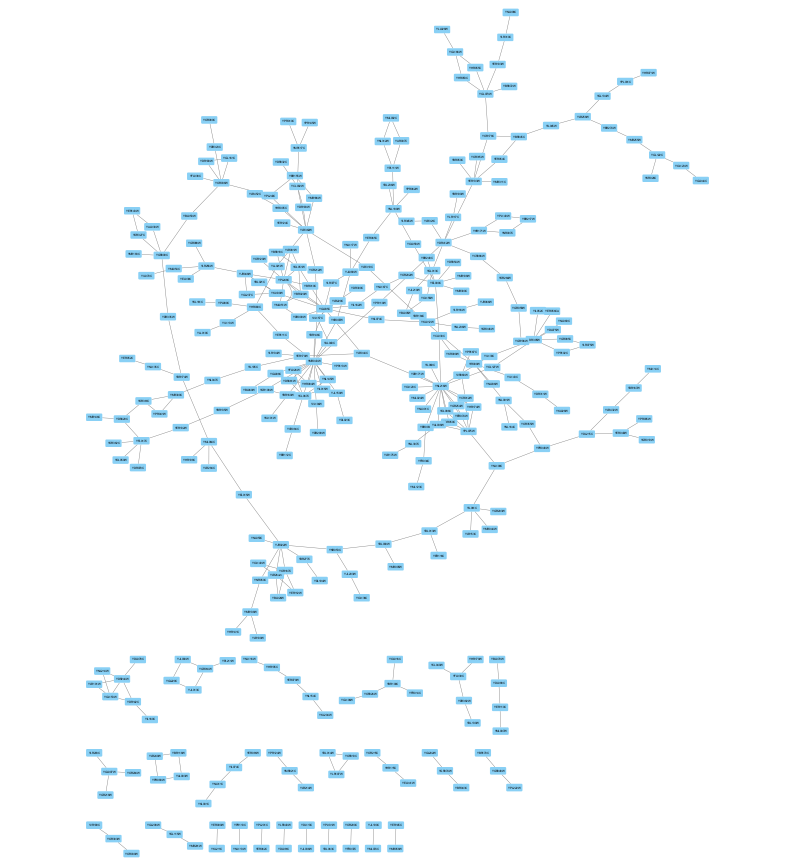

In [10]:
p4c.export_image(filename="galFiltered.png")
from IPython.display import Image
Image('galFiltered.png')

You should now see a network with just over 300 nodes. If you look at the Node Table, you’ll see that there are no attributes other than node names. Let’s fix that…

## Import Data
You can import data into Cytoscape from any `DataFrame` in Python as long as it contains row.names (or an arbitrary column) that match a Node Table column in Cytoscape. In this example, we are starting with a network with yeast identifiers in the “name” column. We also have a CSV file with gene expression data values keyed by yeast identifiers here:

In [11]:
import pandas as pd
url="https://raw.githubusercontent.com/cytoscape/RCy3/master/inst/extdata/galExpData.csv"
df=pd.read_csv(url)

In [12]:
df.head()

,name,COMMON,gal1RGexp,gal1RGsig,gal4RGexp,gal4RGsig,gal80Rexp,gal80Rsig
0,YDL194W,SNF3,0.139,1.804300e-02,0.333,3.396100e-02,0.449,0.011348
1,YDR277C,MTH1,0.243,2.190000e-05,0.192,2.804400e-02,0.448,0.000573
2,YBR043C,YBR043C,0.454,5.370000e-08,0.023,9.417800e-01,0.000,0.999999
3,YPR145W,ASN1,-0.195,3.170000e-05,-0.614,1.150000e-07,-0.232,0.001187
4,YER054C,GIP2,0.057,1.695800e-01,0.206,6.200000e-04,0.247,0.004360


In [13]:
p4c.load_table_data(df, data_key_column="name")

'Success: Data loaded in defaultnode table'

If you look back at the Node Table, you’ll now see that the corresponding rows of our `DataFrame` have been imported as new columns.

**Note: we relied on the default values for table ("node") and `table_key_column` ("name"), but these can be specified as well.**
**See help docs for parameter details.**

In [14]:
help(p4c.load_table_data)

Help on function load_table_data in module py4cytoscape.tables:

load_table_data(data, data_key_column='row.names', table='node', table_key_column='name', namespace='default', network=None, base_url='http://localhost:1234/v1')
    Loads data into Cytoscape tables keyed by row.
    
    This function loads data into Cytoscape node/edge/network
    tables provided a common key, e.g., name. Data.frame column names will be
    used to set Cytoscape table column names.
    Numeric values will be stored as Doubles in Cytoscape tables.
    Integer values will be stored as Integers. Character or mixed values will be
    stored as Strings. Logical values will be stored as Boolean. Lists are
    stored as Lists by CyREST v3.9+. Existing columns with the same names will
    keep original type but values will be overwritten.
    
    Args:
        data (dataframe): each row is a node and columns contain node attributes
        data_key_column (str): name of data.frame column to use as key; ' defau